In [8]:
import pandas as pd
import numpy as np 
import seaborn as sb 
import matplotlib as mpl
from matplotlib import pyplot as plt 
# importer en dataframe
ipc_df = pd.read_csv("./IPC_France.csv")
freq_df = pd.read_csv("./cinema.xlsx_freq.csv")

# rassembler les dataframes avec les colonnes qui nous intéressent 
big_df = pd.merge(freq_df, ipc_df, on = "TIME")
display(big_df)

,TIME,Entrées (millions),Recette hors TSA (M€ courants),Recette moyenne par entrée (€),LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
0,1955,394.8,73.5,0.19,FRA,CPI,TOT,IDX2015,A,7.409065,NaN
1,1956,398.8,75.9,0.19,FRA,CPI,TOT,IDX2015,A,7.549639,NaN
2,1957,411.6,83.6,0.20,FRA,CPI,TOT,IDX2015,A,7.780481,NaN
3,1958,371.0,90.7,0.24,FRA,CPI,TOT,IDX2015,A,8.967824,NaN
4,1959,353.7,90.7,0.26,FRA,CPI,TOT,IDX2015,A,9.489326,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61,2016,213.2,"1,388.4",6.51,FRA,CPI,TOT,IDX2015,A,100.182500,NaN
62,2017,209.4,"1,380.6",6.59,FRA,CPI,TOT,IDX2015,A,101.216700,NaN
63,2018,201.2,"1,336.9",6.64,FRA,CPI,TOT,IDX2015,A,103.090000,NaN
64,2019,213.2,"1,448.7",6.79,FRA,CPI,TOT,IDX2015,A,104.232500,NaN


### Comparaison graphique des recettes par entrée comparée à l'IPC 
***

,TIME,Recette moyenne par entrée (€),Value,price/IPC
0,1955,0.19,7.409065,0.014077
1,1956,0.19,7.549639,0.014344
2,1957,0.20,7.780481,0.015561
3,1958,0.24,8.967824,0.021523
4,1959,0.26,9.489326,0.024672
...,...,...,...,...
61,2016,6.51,100.182500,6.521881
62,2017,6.59,101.216700,6.670181
63,2018,6.64,103.090000,6.845176
64,2019,6.79,104.232500,7.077387


<Figure size 2200x1600 with 0 Axes>

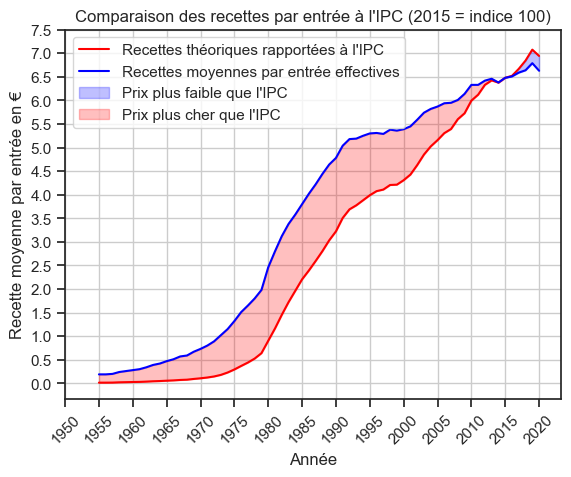

<Figure size 2200x1600 with 0 Axes>

In [34]:
# On s'intéresse à l'évolution comparée de Value et Recette moyenne par entrée en fonction de TIME
plot_df = big_df.loc[:,["TIME", "Recette moyenne par entrée (€)", "Value"]]
# dictionnaire de style 
sb.set_theme(context="notebook", style="ticks", palette="deep",
                   font="sans-serif", font_scale = 1, color_codes = True) 
# on voudrait un histogramme avec une ligne 
# il faut faire prix / IPC * 100
plot_df["price/IPC"] = big_df["Recette moyenne par entrée (€)"].astype(float)*big_df["Value"].astype(float)/100
display(plot_df)
# on doit faire deux axes : price / IPC comparé à recette 
fig, ax = plt.subplots()
time = plot_df["TIME"]
price = plot_df['Recette moyenne par entrée (€)'].astype(float)
ipc = plot_df["price/IPC"].astype(float)
line1 = ax.plot(time, ipc, color = "red", label = "Recettes théoriques rapportées à l'IPC")
line2 = ax.plot(time, price, color = "blue", label = "Recettes moyennes par entrée effectives")
# on va remplir l'aire en bleu quand le prix est en dessous de ce que l'IPC suggère 
ax.fill_between(
    time, ipc, price, where=(ipc > price), 
    interpolate=True, color="blue", alpha=0.25, 
    label="Prix plus faible que l'IPC"
)
# et on la remplit en rouge quand elle est au-dessus 
ax.fill_between(
    time, ipc, price, where=(ipc <= price), 
    interpolate=True, color="red", alpha=0.25, 
    label="Prix plus cher que l'IPC"
)
# on rajoute des ticks et labels 
ax.set_xlabel("Année")
ax.set_ylabel("Recette moyenne par entrée en €")
xticks = np.arange(1950, 2025, 5)
yticks = np.arange(0, 8, 0.5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.xticks(rotation = 45)
ax.set_title("Comparaison des recettes par entrée à l'IPC (2015 = indice 100)")
# on rajoute une grid 
ax.grid(which = "major")
ax.legend()
# la taille 
plt.figure(figsize=(22,16))
